## Looking at balance sheets and financial statements for companies
*Selected companies follow points mentioned by William Ackman in Big Think Video*
1. Companies have barriers to entry, lower chance of new competition (e.g. TSLA, COKE, AAPL)
2. Generally immune to extrinsic factors
3. Strong understanding of how these companies make money

In [6]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import datetime as dt
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
api_key = '1d10376fbb56abe7a58f35989e4184f5'
company = 'GOOGL'
years = 3
data = {}

In [7]:
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarterly&limit={years}&apikey={api_key}')
balance_sheet = balance_sheet.json()
print('--Keys for balance sheet--')
#print(balance_sheet[0].keys())
#print(balance_sheet)

--Keys for balance sheet--


In [8]:
financial_statement = requests.get(f'https://financialmodelingprep.com/api/v3/financial-growth/{company}?limit={years}&apikey={api_key}')
financial_statement = financial_statement.json()
print('--Keys for financial statement--')
#print(financial_statement[0].keys())
#print(financial_statement)

--Keys for financial statement--


In [9]:
current_assets1 = balance_sheet[0]['totalCurrentAssets']
current_liabilities1 = balance_sheet[0]['totalCurrentLiabilities']
total_debt1 = balance_sheet[0]['totalDebt']
cash_and_equivalents1 = balance_sheet[0]['cashAndCashEquivalents']

current_assets2 = balance_sheet[1]['totalCurrentAssets']
current_liabilities2 = balance_sheet[1]['totalCurrentLiabilities']
total_debt2 = balance_sheet[1]['totalDebt']
cash_and_equivalents2 = balance_sheet[1]['cashAndCashEquivalents']

current_assets3 = balance_sheet[2]['totalCurrentAssets']
current_liabilities3 = balance_sheet[2]['totalCurrentLiabilities']
total_debt3 = balance_sheet[2]['totalDebt']
cash_and_equivalents3 = balance_sheet[2]['cashAndCashEquivalents']

cash_debt_data = [cash_and_equivalents1 - total_debt1,
                  cash_and_equivalents2 - total_debt2, cash_and_equivalents3 - total_debt3]
asset_liability_data = [current_assets1 - current_liabilities1, current_assets2 - current_liabilities2, 
                       current_assets3 - current_liabilities3]
data['cash_debt'] = cash_debt_data
data['asset_liability'] = asset_liability_data

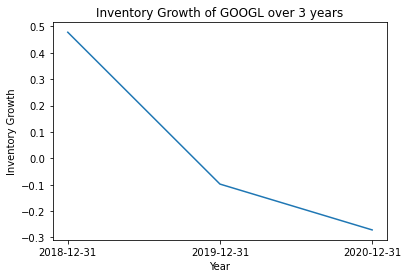

In [10]:
inventory_0 = financial_statement[0]['inventoryGrowth']
inventory_1 = financial_statement[1]['inventoryGrowth']
inventory_2 = financial_statement[2]['inventoryGrowth']
inventory_data = [inventory_2, inventory_1, inventory_0]
data['inventory'] = inventory_data

plt.plot([1,2,3], inventory_data)
plt.title(f'Inventory Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('Inventory Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

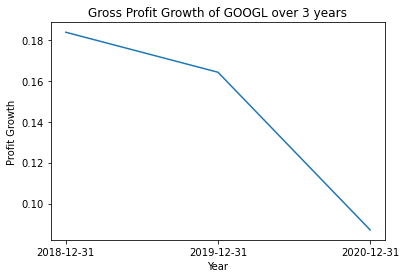

In [11]:
profit_0 = financial_statement[0]['grossProfitGrowth']
profit_1 = financial_statement[1]['grossProfitGrowth']
profit_2 = financial_statement[2]['grossProfitGrowth']
profit_data = [profit_2, profit_1, profit_0]
data['profit'] = profit_data

plt.plot([1,2,3], profit_data)
plt.title(f'Gross Profit Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('Profit Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

**Specifially, stocks with EPS growth rates of at least 25% compared with year-ago levels suggest a company has products or services in strong demand**

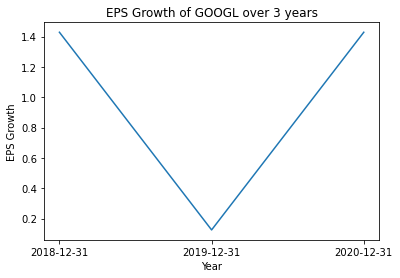

In [12]:
eps_0 = financial_statement[0]['epsgrowth']
eps_1 = financial_statement[1]['epsgrowth']
eps_2 = financial_statement[2]['epsgrowth']
eps_data = [eps_2, eps_1, eps_2]
data['eps'] = eps_data

plt.plot([1,2,3], eps_data)
plt.title(f'EPS Growth of {company} over {years} years')
plt.xlabel('Year')
plt.ylabel('EPS Growth')
plt.xticks([1,2,3],[financial_statement[2]['date'], financial_statement[1]['date'], financial_statement[0]['date']])
plt.show()

# Company buy rating based upon financialmodelingprep api
[More Info](https://site.financialmodelingprep.com/developer/docs/recommendations-formula)

In [13]:
buy_rating = requests.get(f'https://financialmodelingprep.com/api/v3/rating/{company}?apikey={api_key}')
buy_rating = buy_rating.json()
format_buy_rating = json.dumps(buy_rating, indent=2)
print(format_buy_rating)

[
  {
    "symbol": "GOOGL",
    "date": "2021-12-09",
    "rating": "A+",
    "ratingScore": 4,
    "ratingRecommendation": "Buy",
    "ratingDetailsDCFScore": 5,
    "ratingDetailsDCFRecommendation": "Strong Buy",
    "ratingDetailsROEScore": 3,
    "ratingDetailsROERecommendation": "Neutral",
    "ratingDetailsROAScore": 3,
    "ratingDetailsROARecommendation": "Neutral",
    "ratingDetailsDEScore": 3,
    "ratingDetailsDERecommendation": "Neutral",
    "ratingDetailsPEScore": 5,
    "ratingDetailsPERecommendation": "Strong Buy",
    "ratingDetailsPBScore": 5,
    "ratingDetailsPBRecommendation": "Strong Buy"
  }
]


# Looking for Head Shoulder Trends
[More Info](https://www.investopedia.com/terms/h/head-shoulders.asp)

[*********************100%***********************]  1 of 1 completed


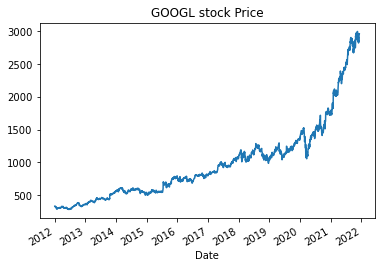

In [14]:
start = dt.datetime(2012,1,1)
end = dt.datetime.now()
stock_data = yf.download(company, start, end)
stock_data['Close'].plot()
plt.title(f'{company} stock Price')
plt.show()

In [15]:
company_df = pd.read_csv('SQ.csv')
stock1 = company_df.loc[company_df['Date'] == '2018-12-31']
stock2 = company_df.loc[company_df['Date'] == '2019-12-31']
stock3 = company_df.loc[company_df['Date'] == '2020-12-31']

lst = [stock1['Close'].values[0], stock2['Close'].values[0], 
       stock3['Close'].values[0]]
data['stock_price'] = lst
df = pd.DataFrame.from_dict(data, orient='index', 
                            columns=[balance_sheet[2]['date'],
                                     balance_sheet[1]['date'],
                                     balance_sheet[0]['date']])

In [16]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()
df = yf.download(company, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1760.000000,1762.489868,1707.140015,1726.130005,1726.130005,1866195
2021-01-05,1725.089966,1746.829956,1716.900024,1740.050049,1740.050049,1017962
2021-01-06,1700.255005,1743.964966,1696.101440,1722.880005,1722.880005,2329401
2021-01-07,1726.760010,1777.819946,1726.760010,1774.339966,1774.339966,2096829
2021-01-08,1777.160034,1799.354980,1761.219971,1797.829956,1797.829956,1774226


In [17]:
df = df[['Close']]
df.Close = df.Close.values[::-1]
ahead = 25
df['Prediction'] = df[['Close']].shift(ahead)
df.tail(4)

/Users/ryandavidson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/1x/ny7dpbts14v6nbh6zc4vnb_40000gn/T/ipykernel_7236/4152134959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(ahead)


,Close,Prediction
Date,,
2021-12-07,1774.339966,2095.030029
2021-12-08,1722.880005,2088.750000
2021-12-09,1740.050049,2086.479980
2021-12-10,1726.130005,2075.389893


In [18]:
x = np.array(df.drop(['Prediction'], 1))[ahead:]
y = np.array(df['Prediction'])[ahead:]

/var/folders/1x/ny7dpbts14v6nbh6zc4vnb_40000gn/T/ipykernel_7236/3839724780.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['Prediction'], 1))[ahead:]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lr = LinearRegression().fit(x_train, y_train)

In [20]:
x_future = df.drop(['Prediction'], 1)[ahead:]
x_future = x_future.tail(ahead)
x_future = np.array(x_future)

/var/folders/1x/ny7dpbts14v6nbh6zc4vnb_40000gn/T/ipykernel_7236/1866821610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[ahead:]


In [21]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions

[2259.0993375  2262.73979117 2233.00825099 2237.44261803 2119.39563904
 2097.39269086 2041.89134133 2063.71684472 2034.77942412 2109.96095814
 2098.414777   2096.96201864 2089.85855609 2086.41235343 2005.66466183
 1957.64682221 1960.43417988 1974.22713586 1965.93280325 1981.86272658
 2016.94905778 1997.10844092 1953.6432305  1968.14575944 1956.38831486]


/var/folders/1x/ny7dpbts14v6nbh6zc4vnb_40000gn/T/ipykernel_7236/1998203450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [22]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,5,5)

data = web.DataReader(company, 'yahoo', start, end)

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [24]:
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [25]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2021-12-10 15:25:53.202345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
72/72 [==============================] - 16s 143ms/step - loss: 0.0077
Epoch 2/25
72/72 [==============================] - 12s 172ms/step - loss: 0.0013
Epoch 3/25
72/72 [==============================] - 12s 167ms/step - loss: 0.0014
Epoch 4/25
72/72 [==============================] - 11s 146ms/step - loss: 0.0014
Epoch 5/25
72/72 [==============================] - 11s 152ms/step - loss: 0.0011
Epoch 6/25
72/72 [==============================] - 10s 144ms/step - loss: 0.0012
Epoch 7/25
72/72 [==============================] - 10s 141ms/step - loss: 0.0012
Epoch 8/25
72/72 [==============================] - 10s 143ms/step - loss: 0.0010
Epoch 9/25
72/72 [==============================] - 10s 145ms/step - loss: 0.0010
Epoch 10/25
72/72 [==============================] - 10s 143ms/step - loss: 0.0010
Epoch 11/25
72/72 [==============================] - 11s 146ms/step - loss: 0.0011
Epoch 12/25
72/72 [==============================] - 11s 151ms/step - loss: 8.7483e-04
Epoch 13/

In [27]:
test_start = dt.datetime(2021,5,5)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [28]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [29]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Text(0, 0.5, 'Share Price')

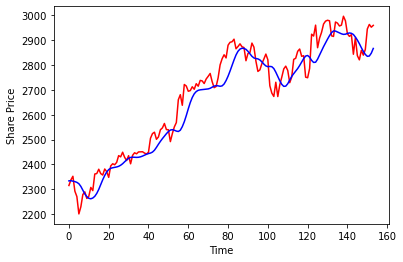

In [31]:
plt.plot(actual_prices, color='red', label='Actual price')
plt.plot(predicted_prices, color='blue', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Share Price')

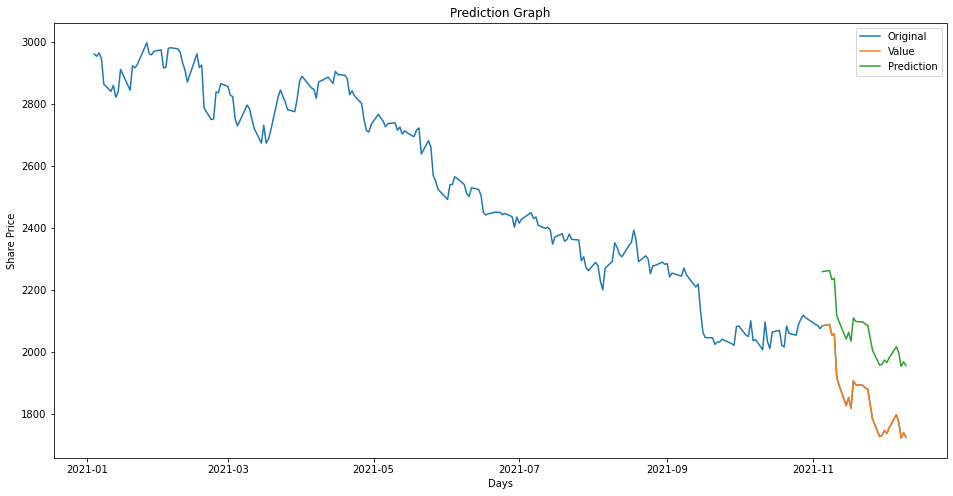

In [33]:
plt.figure(figsize=(16,8))
plt.title('Prediction Graph')
plt.xlabel('Days')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.ylabel('Share Price')
plt.show()